<a href="https://colab.research.google.com/github/Yanaput/EGCI463-pattern-recognition-project/blob/main/nsynth_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# nsynth dataset(test set) from https://huggingface.co/datasets/TwinkStart/Nsynth

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import userdata
projPath  = userdata.get('driveProjDir') #replace this with your csv path

In [ ]:
features_label = pd.read_csv(f"/content/drive/MyDrive/{projPath}/features_label.csv")

In [ ]:
features_label

,0,1,2,3,4,5,6,7,8,9,...,12023,12024,12025,12026,12027,12028,12029,12030,12031,instrument_family
0,-53.803909,-57.194024,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,3
1,-41.581627,-41.147030,-50.666237,-64.943981,-60.756839,-60.464744,-60.993004,-63.912845,-61.711862,-62.382845,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,6
2,-16.751124,-14.606224,-14.500415,-14.003709,-14.280511,-14.614283,-15.854235,-16.143106,-17.500415,-20.172544,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-74.445993,0
3,-2.217868,0.000000,-2.265561,-4.262692,-5.280903,-6.297461,-7.342139,-8.409485,-9.516589,-10.664447,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4,-39.486546,-30.101491,-29.918419,-34.714702,-49.770357,-55.999469,-55.860402,-53.477410,-59.263462,-60.489511,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,-22.894519,-21.310778,-27.454087,-33.497683,-33.068524,-32.833817,-32.720519,-32.592567,-32.394799,-32.219643,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
4092,-50.416488,-42.023727,-39.495096,-41.555525,-51.454520,-54.918152,-60.328524,-69.375597,-73.076184,-73.600458,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4093,-22.917634,-27.114879,-52.179479,-67.841889,-68.402644,-65.043253,-62.685682,-72.406796,-67.885038,-63.723752,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,5
4094,-68.290314,-59.045592,-54.324949,-57.203160,-57.954304,-56.753415,-57.259861,-60.041177,-60.289779,-60.373389,...,-80.0,-80.0,-80.0,-78.91858,-80.0,-80.0,-80.0,-80.0,-63.326588,9


In [ ]:
class_list = ['guitar',
 'organ',
 'bass',
 'keyboard',
 'reed',
 'string',
 'mallet',
 'flute',
 'brass',
 'vocal'
]

# Model with defualt params



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=2000)

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
pred = lr.predict(x_test)

In [ ]:
lr.score(x_test, y_test)

0.8658536585365854

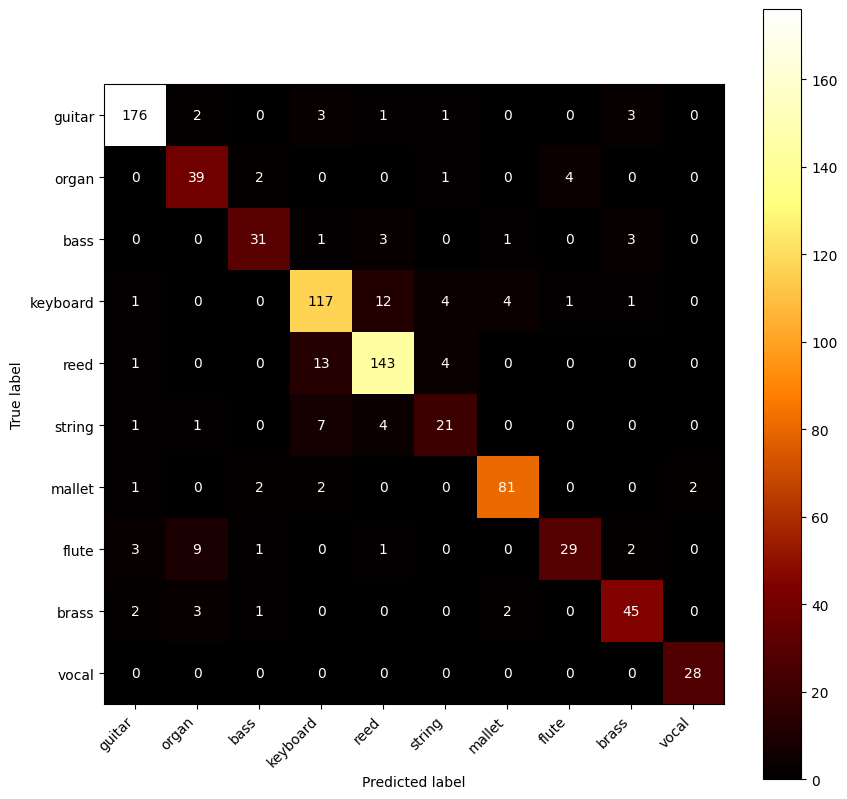

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_list)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.plot(ax=ax, cmap="afmhot")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
f1_score(y_test, pred, average='macro')

0.835885600285841

In [ ]:
accuracy_score(y_test, pred)

0.8658536585365854

In [ ]:
precision_score(y_test, pred, average='macro')


0.8419026192535934

In [ ]:
recall_score(y_test, pred, average='macro')

0.8344450136942466

# Grid Search CV

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_label.iloc[:, :-1], features_label.iloc[:,-1], test_size=0.2, random_state=3213123)

In [ ]:
param_dict = {
    'tol' : [0.005, 0.0001],
    'solver': ['saga', 'lbfgs', 'newton-cg']
}


In [ ]:
grid_lr = LogisticRegression(max_iter=2000)

In [ ]:
grid_search = GridSearchCV(
    estimator=grid_lr,
    param_grid=param_dict,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [ ]:
grid_result = grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# mean validation accuracy
grid_result.best_score_

0.8550061050061051

In [ ]:
grid_result.best_params_

{'solver': 'saga', 'tol': 0.0001}

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([ 308.91837319, 5066.10466957,  153.57714152,  259.68922901,
         130.4484992 ,  198.58083312]),
 'std_fit_time': array([ 10.60444264, 757.24573432,  32.72728066,  47.2150032 ,
         12.5976151 ,   9.83925517]),
 'mean_score_time': array([0.28572687, 0.19417087, 0.21038087, 0.21264672, 0.33534702,
        0.2840577 ]),
 'std_score_time': array([0.09127313, 0.05344985, 0.00640374, 0.00718198, 0.09397351,
        0.09226781]),
 'param_solver': masked_array(data=['saga', 'saga', 'lbfgs', 'lbfgs', 'newton-cg',
                    'newton-cg'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tol': masked_array(data=[0.005, 0.0001, 0.005, 0.0001, 0.005, 0.0001],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'solver': 'saga', 'tol': 0.005},
  {'solver': 'saga', 'tol': 0.0001},
  {'solver': 'lbfgs', 'tol': 0.005},
  {'solver': 'lbfgs

In [ ]:
grid_pred = grid_result.best_estimator_.predict(x_test)
grid_pred

array([4, 1, 3, 8, 0, 1, 0, 8, 6, 3, 4, 6, 4, 9, 9, 4, 7, 0, 3, 0, 6, 1,
       2, 4, 7, 0, 8, 6, 0, 8, 6, 9, 3, 5, 9, 4, 1, 4, 4, 1, 0, 4, 0, 0,
       7, 0, 4, 3, 3, 1, 0, 6, 4, 3, 4, 6, 0, 6, 4, 2, 9, 0, 4, 0, 6, 4,
       0, 3, 3, 0, 0, 3, 0, 6, 3, 0, 1, 1, 2, 3, 4, 0, 2, 0, 0, 8, 3, 4,
       0, 0, 6, 0, 3, 8, 0, 0, 8, 4, 3, 2, 4, 6, 3, 5, 4, 3, 1, 4, 8, 0,
       6, 2, 0, 6, 4, 7, 3, 0, 1, 3, 4, 4, 8, 7, 5, 0, 2, 0, 4, 9, 8, 8,
       6, 4, 0, 0, 4, 7, 3, 0, 4, 0, 4, 2, 3, 1, 4, 4, 9, 3, 4, 7, 8, 3,
       3, 4, 3, 0, 4, 0, 3, 2, 4, 4, 0, 0, 8, 4, 6, 3, 4, 4, 3, 2, 8, 3,
       3, 0, 4, 3, 4, 0, 0, 2, 8, 3, 3, 4, 6, 3, 6, 4, 6, 7, 4, 2, 5, 0,
       7, 4, 4, 8, 3, 3, 4, 4, 3, 4, 3, 7, 8, 0, 8, 0, 4, 3, 0, 0, 1, 3,
       0, 6, 0, 6, 4, 4, 4, 4, 0, 3, 0, 3, 6, 3, 3, 0, 4, 7, 7, 0, 4, 3,
       4, 1, 4, 7, 0, 0, 0, 0, 6, 0, 0, 3, 7, 6, 0, 0, 1, 4, 4, 4, 7, 4,
       5, 0, 1, 0, 0, 6, 8, 6, 9, 6, 9, 0, 3, 6, 5, 6, 8, 4, 9, 3, 9, 3,
       0, 4, 6, 3, 0, 0, 0, 2, 0, 0, 3, 0, 4, 3, 4,

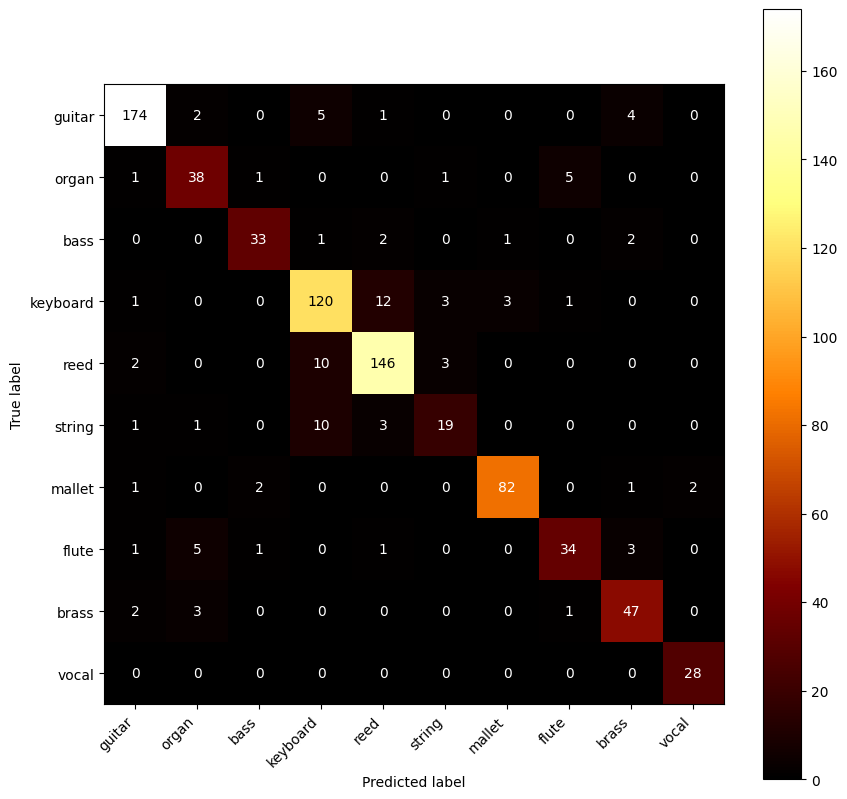

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, grid_pred)
ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_list)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.plot(ax=ax, cmap="afmhot")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
f1_score(y_test, grid_pred, average='macro')

0.8532999283468007

In [ ]:
accuracy_score(y_test, grid_pred)

0.8792682926829268

In [ ]:
precision_score(y_test, grid_pred, average='macro')

0.8596408693559621

In [ ]:
recall_score(y_test, grid_pred, average='macro')

0.850468954853852

In [ ]:
import joblib
joblib.dump(grid_result.best_estimator_, 'lr_grid_model-acc0.87-f10.85.pkl')

['lr_grid_model-acc0.87-f10.85.pkl']